# Association Rules Exercise: Auto Sales

The exercises in this notebook are similar to what you have seen in the labs/practices. 

This notebook uses auto sales data for the resale of cars. Let's try to find if there are patterns of features that occur frequently.


The two fields of data **`dateCreated`** and **`lastSeen`** could be indicators of when a car came into the store and when it left the store (or was sold). If we take the difference in days then we can try to predict the number of days it took for the car to be resold. 

Read the data from `/dsa/data/all_datasets/autos.csv`

In [30]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
%matplotlib inline

**Activity 1:** Read the auto_sales data into a variable called auto_sales

In [31]:
# Your code for activity 1 goes here.
# ------------------------------------

auto_sales = pd.read_csv('/dsa/data/all_datasets/autos.csv')

In [32]:
auto_sales.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


**Activity 2:** Trim both the leading and trailing white spaces from the name column in auto_sales

In [33]:
# Your code for activity 2 goes here.
# ------------------------------------

auto_sales['name'] = auto_sales['name'].str.strip()

In [34]:
auto_sales.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


**Activity 3:** Replace the underscores between the words in the name column with white spaces

In [35]:
# Your code for activity 3 goes here.
# ------------------------------------

auto_sales['name'] = auto_sales['name'].replace('_', ' ', regex=True)

In [36]:
auto_sales.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf 3 1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5 Sportback 2.7 Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep Grand Cherokee ""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF 4 1 4 3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda Fabia 1.4 TDI PD Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


**Activity 4:**
Generate the days column by subtracting the **dateCreated** from the **lastSeen** column. 

**HINT:** You can directly subtract the dates if they are in proper date format. 

In [37]:
# Your code for activity 4 goes here.
# ------------------------------------
from datetime import datetime

auto_sales['dateCreated'] = pd.to_datetime(auto_sales['dateCreated'])
auto_sales['lastSeen'] = pd.to_datetime(auto_sales['lastSeen'])

In [38]:
auto_sales['days'] = auto_sales['lastSeen'].sub(auto_sales['dateCreated'], axis=0)

In [39]:
auto_sales.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,days
0,2016-03-24 11:52:17,Golf 3 1.6,privat,Angebot,480,test,NaN,1993,manuell,0,...,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57,14 days 03:16:57
1,2016-03-24 10:58:45,A5 Sportback 2.7 Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50,14 days 01:46:50
2,2016-03-14 12:52:21,"Jeep Grand Cherokee ""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46,22 days 12:47:46
3,2016-03-17 16:54:04,GOLF 4 1 4 3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,0 days 17:40:17
4,2016-03-31 17:25:20,Skoda Fabia 1.4 TDI PD Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,6 days 10:17:21


**Activity 5:** Remove the columns dateCrawled, dateCreated and lastSeen from the dataframe

In [40]:
# Your code for activity 5 goes here.
# ------------------------------------

auto_sales = auto_sales.drop(['dateCrawled', 'dateCreated', 'lastSeen'],axis=1)


**Activity 6:** Convert all columns to Dtype object. Verify the data type of all columns. Make sure all columns are of factor type before we create transactions from auto-sales dataframe. 

In [41]:
# Your code for activity 5 goes here.
# ------------------------------------

auto_sales = auto_sales.astype(str)


In [42]:
auto_sales.dtypes

name                   object
seller                 object
offerType              object
price                  object
abtest                 object
vehicleType            object
yearOfRegistration     object
gearbox                object
powerPS                object
model                  object
kilometer              object
monthOfRegistration    object
fuelType               object
brand                  object
notRepairedDamage      object
nrOfPictures           object
postalCode             object
days                   object
dtype: object

**Activity 7:** auto_sales is a large dataset, so use first 5000 rows. The server cannot be able to generate transactions for such large data.

Now, coerce the data set into transactions. Save the transactions to the variable auto_trans. 

In [43]:
auto_sales = auto_sales[:5000]

In [44]:
%%time
# Your code for activity 6 goes here.
# ------------------------------------

auto_trans = pd.get_dummies(auto_sales.astype(str))

CPU times: user 223 ms, sys: 19.7 ms, total: 243 ms
Wall time: 242 ms


**Activity 8:** Generate association rules for the transactions in auto_trans with support of 0.3 and confidence of 0.6. How many rules are there?

In [45]:
%%time 
# Your code for activity 7 goes here.
# ------------------------------------
frequent_itemsets = apriori(auto_trans, min_support = 0.3,use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)


CPU times: user 556 ms, sys: 78 ms, total: 634 ms
Wall time: 633 ms


**Activity 9:** Draw a scatter plot for the generated rules using 'support' and 'confidence'. Use 'leverage' for shading. 

In [46]:
# Your code for activity 10 goes here.
# ------------------------------------
support=rules['support']
confidence=rules['confidence']

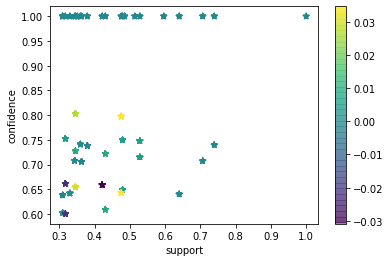

In [47]:
plt.scatter(support, confidence, c = rules['leverage'], alpha=0.5, marker="*")
plt.colorbar()
plt.xlabel('support')
plt.ylabel('confidence'); 
plt.show()

**Activity 10:** Draw a scatter plot with lift and leverage scores. Shade using conviction. Identify 5 rules with relatively high lift, leverage, and conviction. (There is no one correct answer)

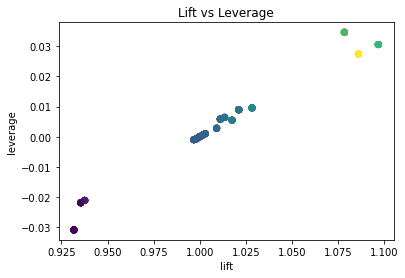

In [50]:
plt.scatter(rules['lift'], rules['leverage'], c=rules['conviction'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('leverage')
plt.title('Lift vs Leverage');
plt.show()

In [53]:
rules_sorted = rules.sort_values(by =['lift', 'leverage', 'conviction'], ascending=False)

In [54]:
rules_sorted.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
255,"(notRepairedDamage_nein, gearbox_manuell)",(fuelType_benzin),0.5286,0.5964,0.3458,0.654181,1.096883,0.030543,1.167084
510,"(notRepairedDamage_nein, seller_privat, gearbo...",(fuelType_benzin),0.5286,0.5964,0.3458,0.654181,1.096883,0.030543,1.167084
514,"(notRepairedDamage_nein, gearbox_manuell)","(seller_privat, fuelType_benzin)",0.5286,0.5964,0.3458,0.654181,1.096883,0.030543,1.167084
627,"(offerType_Angebot, gearbox_manuell, notRepair...",(fuelType_benzin),0.5286,0.5964,0.3458,0.654181,1.096883,0.030543,1.167084
631,"(notRepairedDamage_nein, gearbox_manuell)","(offerType_Angebot, fuelType_benzin)",0.5286,0.5964,0.3458,0.654181,1.096883,0.030543,1.167084


**Activity 11:** Write the generated rules to a csv file called "auto_sales.csv"

In [55]:
# Your code for activity 10 goes here.
# ------------------------------------

rules_sorted = rules.to_csv("auto_sales.csv")






# Save your notebook, then `File > Close and Halt`